# KNN Regression


In [1]:
import numpy as np
import pandas as pd

#Boston Housing Dataset: Load the boston dataset.
from sklearn.datasets import load_boston
boston = load_boston()

#Creating feature and target arrays
X, y = boston.data, boston.target
columns = boston.feature_names

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False).fit(X)
scaler.transform(X)

'''
Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data. 
For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], 
or standardize it to have mean 0 and variance 1. Note that you must apply the same scaling 
to the test set for meaningful results. You can use StandardScaler for standardization.
'''

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=123)



In [2]:
X_train.shape

(354, 13)

In [4]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#DEFINE YOUR REGRESSOR and THE PARAMETERS GRID
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()

# n_neighbors: Number of neighbors 
# weight: ‘uniform’ : uniform weights. ‘distance’ : weight points by the inverse of their distance.
# p Power parameter for the Minkowski metric.
# n_job:  number of parallel jobs to run (-1)

parameters = {'n_neighbors': np.arange(5, 30)
              ,'p': [1,2,3]
            }

#DEFINE YOUR GRIDSEARCH 
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(regressor, parameters, cv=3, verbose = 50, scoring ='neg_mean_absolute_error')#,https://scikit-learn.org/stable/modules/model_evaluation.html 
#with no params it reduces to a CV
#'neg_mean_absolute_error',
#'neg_mean_squared_error'
# 'r2'

gs = gs.fit(X_train,y_train)



Fitting 3 folds for each of 75 candidates, totalling 225 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] n_neighbors=5, p=1 ..............................................
[CV] ................. n_neighbors=5, p=1, score=-3.181, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] n_neighbors=5, p=1 ..............................................
[CV] ................. n_neighbors=5, p=1, score=-2.986, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] n_neighbors=5, p=1 ..............................................
[CV] ................. n_neighbors=5, p=1, score=-3.452, total=   0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[CV] n_neighbors=5, p=2 ..............................................
[CV] ................. n_neighbors=5, p=2, score=-3.040, total=   0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elaps

[CV] ................ n_neighbors=12, p=3, score=-3.476, total=   0.0s
[CV] n_neighbors=12, p=3 .............................................
[CV] ................ n_neighbors=12, p=3, score=-3.475, total=   0.0s
[CV] n_neighbors=13, p=1 .............................................
[CV] ................ n_neighbors=13, p=1, score=-3.069, total=   0.0s
[CV] n_neighbors=13, p=1 .............................................
[CV] ................ n_neighbors=13, p=1, score=-3.238, total=   0.0s
[CV] n_neighbors=13, p=1 .............................................
[CV] ................ n_neighbors=13, p=1, score=-3.639, total=   0.0s
[CV] n_neighbors=13, p=2 .............................................
[CV] ................ n_neighbors=13, p=2, score=-3.144, total=   0.0s
[CV] n_neighbors=13, p=2 .............................................
[CV] ................ n_neighbors=13, p=2, score=-3.374, total=   0.0s
[CV] n_neighbors=13, p=2 .............................................
[CV] .

[CV] ................ n_neighbors=19, p=3, score=-3.582, total=   0.0s
[CV] n_neighbors=19, p=3 .............................................
[CV] ................ n_neighbors=19, p=3, score=-3.697, total=   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] ................ n_neighbors=20, p=1, score=-3.246, total=   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] ................ n_neighbors=20, p=1, score=-3.469, total=   0.0s
[CV] n_neighbors=20, p=1 .............................................
[CV] ................ n_neighbors=20, p=1, score=-3.812, total=   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] ................ n_neighbors=20, p=2, score=-3.404, total=   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] ................ n_neighbors=20, p=2, score=-3.500, total=   0.0s
[CV] n_neighbors=20, p=2 .............................................
[CV] .

[CV] ................ n_neighbors=28, p=3, score=-3.925, total=   0.0s
[CV] n_neighbors=29, p=1 .............................................
[CV] ................ n_neighbors=29, p=1, score=-3.562, total=   0.0s
[CV] n_neighbors=29, p=1 .............................................
[CV] ................ n_neighbors=29, p=1, score=-3.785, total=   0.0s
[CV] n_neighbors=29, p=1 .............................................
[CV] ................ n_neighbors=29, p=1, score=-4.068, total=   0.0s
[CV] n_neighbors=29, p=2 .............................................
[CV] ................ n_neighbors=29, p=2, score=-3.630, total=   0.0s
[CV] n_neighbors=29, p=2 .............................................
[CV] ................ n_neighbors=29, p=2, score=-3.737, total=   0.0s
[CV] n_neighbors=29, p=2 .............................................
[CV] ................ n_neighbors=29, p=2, score=-3.929, total=   0.0s
[CV] n_neighbors=29, p=3 .............................................
[CV] .

In [40]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#Returns the coefficient of determination R^2 of the prediction.
#Explained variance score: 1 is perfect prediction
gs.score(X_test, y_test)

***GRIDSEARCH RESULTS***
Best score: -3.135795 using {'n_neighbors': 7, 'p': 2}
-3.206667 (0.191125) with: {'n_neighbors': 5, 'p': 1}
-3.162486 (0.206327) with: {'n_neighbors': 5, 'p': 2}
-3.174633 (0.101233) with: {'n_neighbors': 5, 'p': 3}
-3.182062 (0.145676) with: {'n_neighbors': 6, 'p': 1}
-3.186252 (0.215122) with: {'n_neighbors': 6, 'p': 2}
-3.166337 (0.113847) with: {'n_neighbors': 6, 'p': 3}
-3.187167 (0.213495) with: {'n_neighbors': 7, 'p': 1}
-3.135795 (0.219968) with: {'n_neighbors': 7, 'p': 2}
-3.164326 (0.131101) with: {'n_neighbors': 7, 'p': 3}
-3.180968 (0.237587) with: {'n_neighbors': 8, 'p': 1}
-3.182698 (0.226548) with: {'n_neighbors': 8, 'p': 2}
-3.242267 (0.109042) with: {'n_neighbors': 8, 'p': 3}
-3.184997 (0.235288) with: {'n_neighbors': 9, 'p': 1}
-3.209353 (0.226549) with: {'n_neighbors': 9, 'p': 2}
-3.284024 (0.080501) with: {'n_neighbors': 9, 'p': 3}
-3.206638 (0.286822) with: {'n_neighbors': 10, 'p': 1}
-3.237599 (0.197573) with: {'n_neighbors': 10, 'p': 2}


-3.2413533834586468

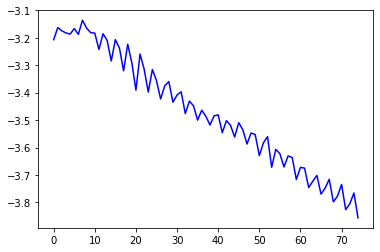

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot (means, color='blue', alpha=1.00)
plt.show()

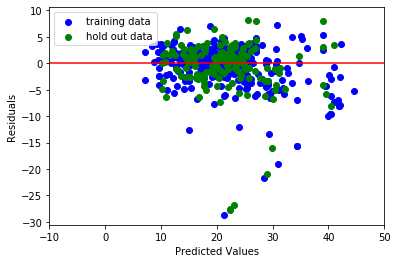

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(gs.predict(X_train),gs.predict(X_train)-y_train, c="b", label="training data")
plt.scatter(gs.predict(X_test),gs.predict(X_test)-y_test, c="g", label="hold out data")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="r")
plt.xlim([-10,50])
plt.show()

In [43]:
from sklearn import metrics

print("MAE train: ", metrics.mean_absolute_error(y_train, gs.predict(X_train))) 
print("MSE train: ",metrics.mean_squared_error(y_train, gs.predict(X_train)))
print("RMSE train: ",np.sqrt(metrics.mean_squared_error(y_train, gs.predict(X_train))))
print("r2: ",np.sqrt(metrics.r2_score(y_train, gs.predict(X_train))))

print("MAE test: ", metrics.mean_absolute_error(y_test, gs.predict(X_test))) 
print("MSE test: ",metrics.mean_squared_error(y_test, gs.predict(X_test)))
print("RMSE test: ",np.sqrt(metrics.mean_squared_error(y_test, gs.predict(X_test))))
print("r2: ",np.sqrt(metrics.r2_score(y_test, gs.predict(X_test))))

MAE train:  2.5259887005649717
MSE train:  15.664421768707479
RMSE train:  3.9578304370838677
r2:  0.9041035883865524
MAE test:  3.2413533834586468
MSE test:  29.140961331901185
RMSE test:  5.398236872526176
r2:  0.7996686083582465
